# Title: Simple CNN for Image Classification

## Paluvadi Surya Vamsi | paluvadisurya@gmail.com | 8110020188

### GitHub : http://github.com/suryavamsi
---


### Project Description


*  To develop a Convolutional Neural Network(CNN) for classifying 4 categories of images provided. The model shouldn't be overfit underfit. 



## Notebook Contents
1.   Data Exploration
2.   Re-Sizing Images
3.   Data Preparation for Model Building
4.   Deep Learning Model Building
5.   Model Evaluation
6.   Conclusion


##  01 - Data Exploration

In [1]:
# Connect training data available in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import the required libraries for image processing and mathematical operation.
import warnings 
warnings.filterwarnings("ignore")                             # To avoid warnings regarding the updates of libraries
import numpy as np                                            # For mathematical operations
import pandas as pd                                           # For Data manipulations & reading
import matplotlib.pyplot as plt                               # For viisualizig 2D Graphs
import seaborn as sns                                         # For plotting beautiful visualizations
import PIL                                                    # For image loading and processing
import glob                                                   # For directory analysis

In [3]:
# Check the available data directories in our current working directory
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
# Check the folders for our data source
glob.glob("drive/My Drive/*")

['drive/My Drive/Colab Notebooks',
 'drive/My Drive/test',
 'drive/My Drive/train']

In [0]:
# Extract the information available in training and testing folders respectively
train_cat = glob.glob("drive/My Drive/train/*")
test_cat = glob.glob("drive/My Drive/test/*")

In [6]:
train_cat

['drive/My Drive/train/category_1',
 'drive/My Drive/train/category_3',
 'drive/My Drive/train/category_2',
 'drive/My Drive/train/category_4']

In [7]:
# Obtain the information of images available in Training Categories
print("*"*50)
for i in train_cat:
  print("There are {} images available in {}".format(len(glob.glob(i+"/*")), i.split("/")[-1]))
  print("*"*50)

**************************************************
There are 102 images available in category_1
**************************************************
There are 112 images available in category_3
**************************************************
There are 107 images available in category_2
**************************************************
There are 119 images available in category_4
**************************************************


In [8]:
# Testing Images
print("*"*50)
print("{} images are available for testing".format(len(test_cat)))
print("*"*50)

**************************************************
30 images are available for testing
**************************************************


In [0]:
# Check the properties of Images from the training categories
cat1_path = glob.glob("drive/My Drive/train/category_1/*")
cat2_path = glob.glob("drive/My Drive/train/category_2/*")
cat3_path = glob.glob("drive/My Drive/train/category_3/*")
cat4_path = glob.glob("drive/My Drive/train/category_4/*")

The shape of Image is (800, 800, 4)


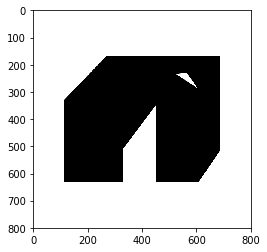

In [10]:
random_image_1 = PIL.Image.open(cat1_path[np.random.randint(len(cat1_path))])
print("The shape of Image is {}".format(np.array(random_image_1).shape))
plt.imshow(np.array(random_image_1))

The shape of Image is (800, 800, 3)


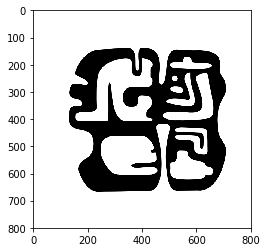

In [11]:
random_image_2 = PIL.Image.open(cat2_path[np.random.randint(len(cat2_path))])
print("The shape of Image is {}".format(np.array(random_image_2).shape))
plt.imshow(np.array(random_image_2))

The shape of Image is (800, 800, 3)


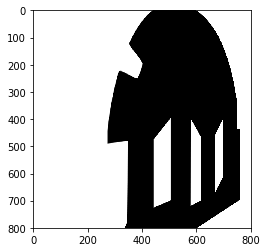

In [12]:
random_image_3 = PIL.Image.open(cat3_path[np.random.randint(len(cat3_path))])
print("The shape of Image is {}".format(np.array(random_image_3).shape))
plt.imshow(np.array(random_image_3))

The shape of Image is (800, 800, 3)


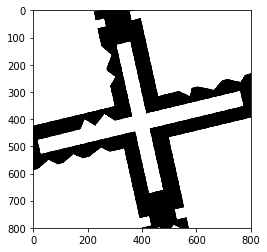

In [13]:
random_image_4 = PIL.Image.open(cat4_path[np.random.randint(len(cat4_path))])
print("The shape of Image is {}".format(np.array(random_image_4).shape))
plt.imshow(np.array(random_image_4))

![](https://i.imgur.com/ZSdJjRo.jpg)



*   We can clearly observe that Category_1 Images are with 4 layers and remaining are with 3 layers of Image Data. We will take the first 3 Layers for Category_1 images to make ease in Image processing while loading data to our Neural Network model.


## 02 - Re-sizing Images

**Procedure**
- Available images are with High Resolution of 800 * 800
- Convert the images to a desired size without loosing features and sharpness.
- We can use PIL library to resize the images using various re-sampling techniques.
- Obtain all the images and thier labels from the directories and store them in separate lists respectively.


![](https://i.imgur.com/M49PRoy.png)

In [0]:
# Creating a function to prepare image data for building Neural Network model.
def Train_img_Resize(directory, length, width):
  train_label = []
  train_image = []
  project_direc = glob.glob(directory+"/*")
  for direc in project_direc:
    # Obtain all the PNG files from the directory and store the paths for Image processing
    image_filename = glob.glob(direc+"/*png")
    for file in image_filename:
      # Extracting the label from the name of the folder that obtained by glob function earlier
      label = direc.split("/")[-1] # Splitting is clearly observed in the top lines of code
      train_label.append(label)
      # Extract the first 3 layers of Images from every category.
      # Step_1 : Open Images using PIL Library
      # Step_2 : Resize the Image to a desired shape.
      # Step_3 : Apply re-sampling technique to not to loose features from image
      # Step_4 : Convert the image to an Array and append to the Image list
      if label == "category_1":
        img = np.array(PIL.Image.open(file).resize([length,width],resample = PIL.Image.BILINEAR))[:,:,:3]
        train_image.append(img)
      else:
        img = np.array(PIL.Image.open(file).resize([length,width],resample = PIL.Image.BILINEAR))[:,:,:3]
        train_image.append(img)
        # Convert the images and labels to numpy arrays
  train_label = np.array(train_label)
  train_image = np.array(train_image)
  return train_image, train_label

In [0]:
# Apply the same process for testing data
def Test_img_Resize(directory, length, width):
  test_image = []
  test_direc = glob.glob(directory+"/*.png")
  for file in test_direc:
    img = np.array(PIL.Image.open(file).resize([length,width],resample = PIL.Image.BILINEAR))[:,:,:3]
    test_image.append(img)
  test_image = np.array(test_image)
  return test_image

In [0]:
train_image, train_label = Train_img_Resize("drive/My Drive/train", 200,200)
test_image = Test_img_Resize("drive/My Drive/test", 200,200)

In [17]:
train_image.shape, train_label.shape

((440, 200, 200, 3), (440,))

In [18]:
test_image.shape

(30, 200, 200, 3)

**The above shape defines**
(440, 150, 150, 3)

- 440 ------------> No of Images
- 200 ------------> No of horizontal pixels
- 200 ------------> No of vertical pixels
- 3 --------------> No of layers (RGB)


## 03 - Data Preparation for Model Building

In [0]:
# Import Neural Network libraries for Model Building
import sklearn                                                    # For machine learning data pre-processing
from sklearn.model_selection import train_test_split              # To obtain splitted data for model validation

In [0]:
X = train_image
y = train_label
X_test = test_image

In [0]:
# Normalize the Image Data to process the data faster
X = train_image / 255
X_test = test_image / 255

In [22]:
X.shape, X_test.shape

((440, 200, 200, 3), (30, 200, 200, 3))

In [0]:
# Create a Training and Validation set from our Training Data
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape

((352, 200, 200, 3), (88, 200, 200, 3), (352,), (88,))

#### 3.1 **One Hot Encoding**

![](https://i.imgur.com/GFdmyu7.jpg)

In [0]:
# We can see that the values of train_labels are in categorical form
# Lets encode these values into 0 & 1 to make our machine understand the classes easily
y_train_onehot = pd.get_dummies(y_train).values
y_validate_onehot = pd.get_dummies(y_validate).values

In [0]:
y_total_onehot = pd.get_dummies(y).values

In [27]:
# As we have converted the data into encoded values, let's look into the converted values.
reverse_lookup = pd.get_dummies(y_train).columns.values.tolist()
reverse_lookup

['category_1', 'category_2', 'category_3', 'category_4']

In [28]:
reverse_lookup_total = pd.get_dummies(y).columns.values.tolist()
reverse_lookup_total

['category_1', 'category_2', 'category_3', 'category_4']

## 04 - Deep Learning Model Building

In [29]:
# Import Deep Learning Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils.vis_utils import plot_model                    # To plot the Model Structure

Using TensorFlow backend.


![](https://i.imgur.com/sYMIkgW.jpg)

In [0]:
# Creating a model consists of different layers of Conv, Pooling, Densing, Flatten and Dropout
# Model Charecteristics : 3 Sets of (2 Convolutions & 1 Max Pooling Layers) followed by dropout & dense.
# Convolution & Max Pooling are used to extract the features from the images using various no of filters.
# Dropout will make a probabilistic decision to pass the input values. 
# Drop out will Lead to protect the model from Overfit & Underfit

def Model(a,b):
  #The input and output shape of our model
  input_shape = a[0].shape
  output_shape = len(b[0])
  #The CNN model
  model = Sequential()
  #####################################################################################
  model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu',input_shape=input_shape))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  
  model.add(Dense(output_shape, name='output', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [31]:
# Create the model using our training data
CNN_Model = Model(X_train, y_train_onehot)

W0817 05:31:07.979741 140419947427712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 05:31:08.018809 140419947427712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 05:31:08.024883 140419947427712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 05:31:08.062860 140419947427712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0817 05:31:08.065420 140419947427712 deprecation_wrapp

In [32]:
# Check the parameters of our model alongside layers information
CNN_Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
__________

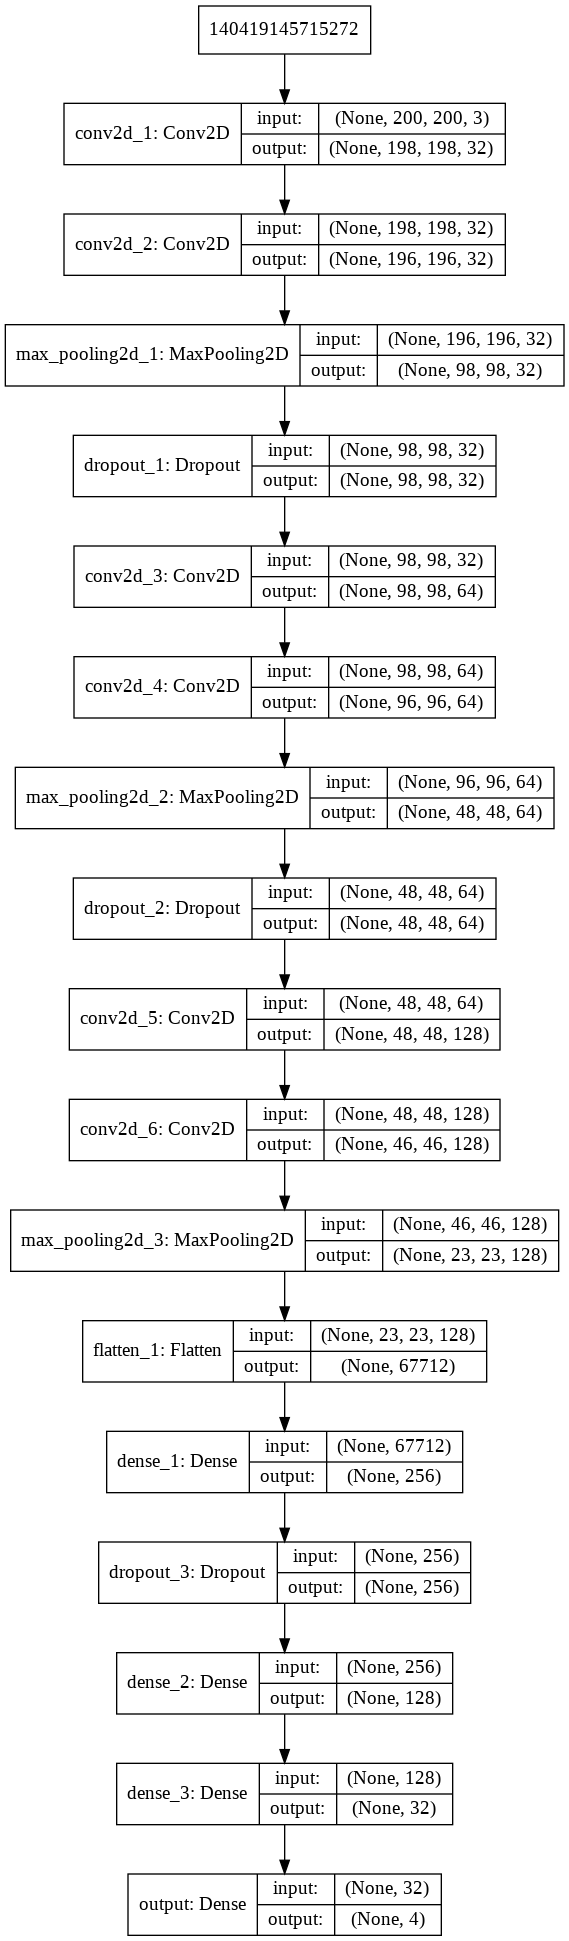

In [33]:
plot_model(CNN_Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
PIL.Image.open("model_plot.png")

#### 4.1 Fitting the model

In [34]:
# Fit the model for Training variables and check the accuracy metrics for validating against splitted validation dataset.
CNN_Model_Log = CNN_Model.fit(X_train,
                              y_train_onehot,
                              epochs=30,
                              verbose=1,
                              batch_size=32,
                              validation_data=[X_validate,y_validate_onehot])

W0817 05:31:08.821536 140419947427712 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 352 samples, validate on 88 samples
Epoch 1/30
352/352 [==============================] - 11s 32ms/step - loss: 1.6153 - acc: 0.2983 - val_loss: 1.3870 - val_acc: 0.3636
Epoch 2/30
352/352 [==============================] - 2s 4ms/step - loss: 1.3699 - acc: 0.2784 - val_loss: 1.3900 - val_acc: 0.2500
Epoch 3/30
352/352 [==============================] - 2s 4ms/step - loss: 1.3494 - acc: 0.3125 - val_loss: 1.3446 - val_acc: 0.2727
Epoch 4/30
352/352 [==============================] - 2s 4ms/step - loss: 1.1936 - acc: 0.4545 - val_loss: 1.0034 - val_acc: 0.5341
Epoch 5/30
352/352 [==============================] - 2s 4ms/step - loss: 1.0830 - acc: 0.5000 - val_loss: 1.0661 - val_acc: 0.6023
Epoch 6/30
352/352 [==============================] - 2s 4ms/step - loss: 0.9372 - acc: 0.5653 - val_loss: 0.8531 - val_acc: 0.6818
Epoch 7/30
352/352 [==============================] - 2s 4ms/step - loss: 0.7501 - acc: 0.6989 - val_loss: 0.7723 - val_acc: 0.7045
Epoch 8/30
352/352 [=========

- **We can observe that the Neural Network architechture is performing well on validation data set, Let's train the model with the complete data set and test it against our testing data set against confusion matrix, accuracy score & other metrics.**
- Validation Data Set -  The Data Set Extracted from Training Data
- Test Set - The Data Set provided for validation testing

## 05 - Model Evaluation

In [0]:
Metrics = CNN_Model.history.history

In [0]:
metrics_df = pd.DataFrame(Metrics, columns=Metrics.keys())

In [37]:
metrics_df.head()

,val_loss,val_acc,loss,acc
0,1.387027,0.363636,1.615269,0.298295
1,1.390021,0.250000,1.369863,0.278409
2,1.344631,0.272727,1.349401,0.312500
3,1.003367,0.534091,1.193613,0.454545
4,1.066135,0.602273,1.083005,0.500000


In [38]:
metrics_df.columns

Index(['val_loss', 'val_acc', 'loss', 'acc'], dtype='object')

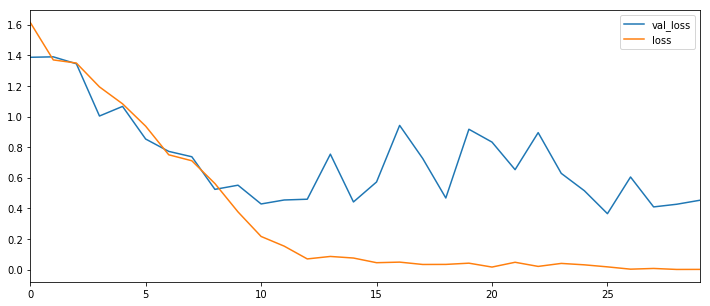

In [39]:
metrics_df[['val_loss', 'loss']].plot(figsize=(12,5))

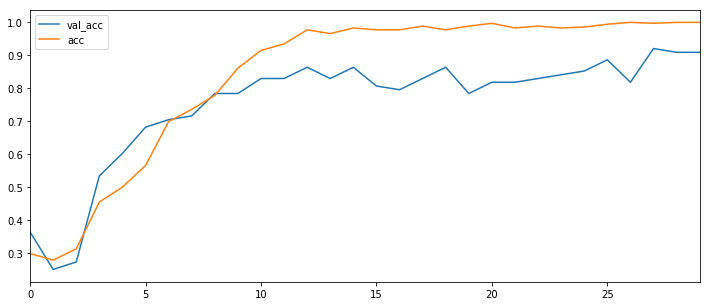

In [40]:
metrics_df[['val_acc', 'acc']].plot(figsize=(12,5))

#### 5.1 **Model Observations**
- We can observe at epoch 20 the metrics are looking fine with both validation & training loss.
- We can choose a epoch value between the range and train the model on whole dataset and plot the prediction of the test dataset.
- Training loss is completely negligible after 15 Epochs & validation loss is better after 15 epochs.
- We can observe that our model achieved mmore than 90% accuracy while testing against validation data set which is quite good & acceptable.

In [0]:
Final_Model = Model(X, y_total_onehot)

In [42]:
Final_Model_log = Final_Model.fit(X, y_total_onehot, batch_size=32, epochs=20)

Epoch 1/20
440/440 [==============================] - 4s 8ms/step - loss: 1.4204 - acc: 0.2773
Epoch 2/20
440/440 [==============================] - 2s 4ms/step - loss: 1.0730 - acc: 0.5091
Epoch 3/20
440/440 [==============================] - 2s 4ms/step - loss: 0.8557 - acc: 0.6159
Epoch 4/20
440/440 [==============================] - 2s 4ms/step - loss: 0.7411 - acc: 0.6659
Epoch 5/20
440/440 [==============================] - 2s 4ms/step - loss: 0.4867 - acc: 0.8227
Epoch 6/20
440/440 [==============================] - 2s 4ms/step - loss: 0.2815 - acc: 0.8909
Epoch 7/20
440/440 [==============================] - 2s 4ms/step - loss: 0.1671 - acc: 0.9409
Epoch 8/20
440/440 [==============================] - 2s 4ms/step - loss: 0.0851 - acc: 0.9705
Epoch 9/20
440/440 [==============================] - 2s 4ms/step - loss: 0.0729 - acc: 0.9750
Epoch 10/20
440/440 [==============================] - 2s 4ms/step - loss: 0.0905 - acc: 0.9705
Epoch 11/20
440/440 [============================

In [0]:
# Let's check the prediction probabilities of test dataset
predicted_probabilities = Final_Model.predict(X_test)

In [0]:
# We have obtained the probabilities of predicted categories
# Step_1 : Create a Zeros like dataset
# Step_2 : Convert the maximum value to 1 and remaining to zero
# Step_3 : Convert one-hot encoded to Categorical values
predicted_categories = np.zeros_like(predicted_probabilities)
predicted_categories[np.arange(len(predicted_probabilities)), predicted_probabilities.argmax(1)] = 1 # Converting max. probability to 1 & remaining to 0.

In [45]:
# Sample of our predicted categories
predicted_categories[:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [46]:
# The quantity of predicted categories
len(predicted_categories)

30

In [0]:
# Create a new predicted category & convert the one hot encoded values to Strings using reverse lookup values.
predicted_category = []
for i in range(len(predicted_categories)):
  predicted_category.append(reverse_lookup_total[np.argmax(predicted_categories[i])])

### 5.2 Plotting Test Data Predictions

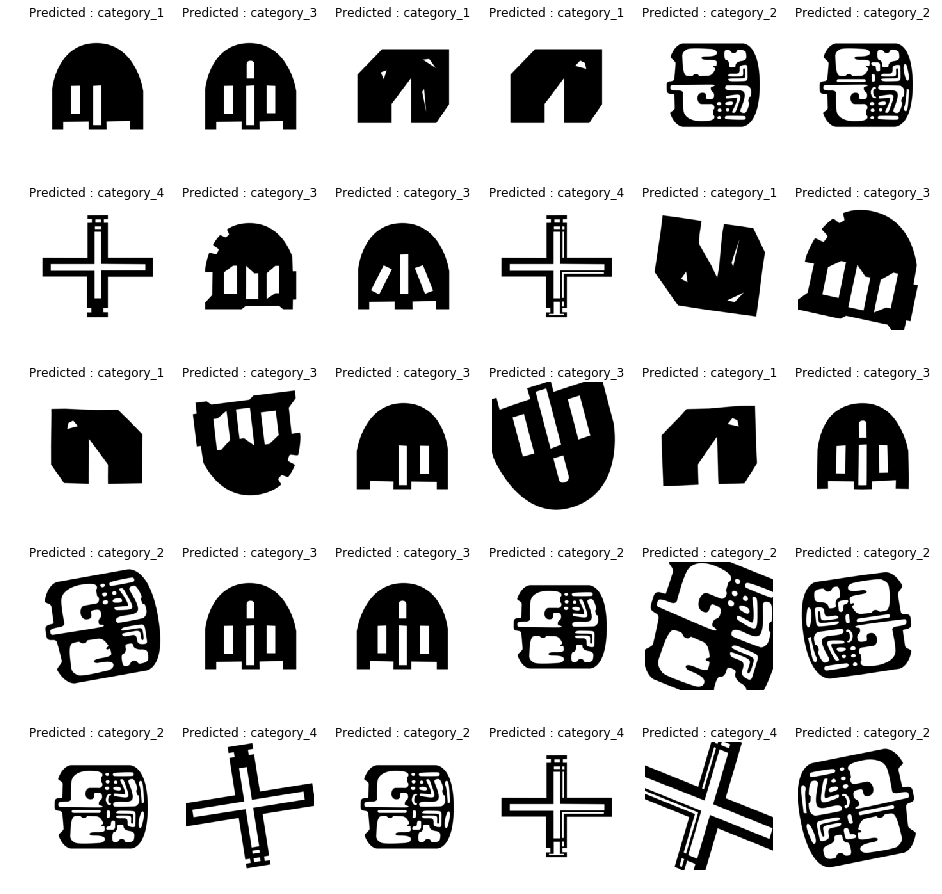

In [48]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(16,16))
axes = axes.ravel()           # To flatten the indixes of axes to directly assign them as an integer
for i in range(len(predicted_category)):
  axes[i].imshow(X_test[i])
  axes[i].axis("off")
  axes[i].set_title("Predicted : {}".format(predicted_category[i]))

## 06 - Conclusion:
- We have achieved best of accuracy% predicting the test dataset.
- A confusion was created by providing 4 Layered images in Category_1 dataset.
- Extracting the features from the low image resolution is easy & can be computed fast.
- We can change the size of image used for training.
- Smaller Image resolution are providing better accuracy results. 
- Plotting the values of validation_loss against training loss made us to decide the no of epochs used for training.
- We have used simple Neural Network with 3 sets of (2 Conolution & Maxpooling) prooceeding by flattening & dense to form fully connected layer.
- The values of Dropout probabilities taken were 0.25 and 0.5(at fully connected layer)
- Using dropouts with various probabilities will increase the model accuracy & decrease the chances of overfitting and under fitting.